In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

######## Evaluation Metrics ########
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    classification_report,
)
import time


In [3]:
df = pd.read_csv(r'card_transdata (1).csv')

# knowing data structure

In [4]:
df.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,not_fraud
1,1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,not_fraud
2,2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,not_fraud
3,3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,not_fraud
4,4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,not_fraud


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000005 entries, 0 to 1000004
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000005 non-null  int64  
 1   distance_from_home              1000004 non-null  float64
 2   distance_from_last_transaction  1000002 non-null  float64
 3   ratio_to_median_purchase_price  1000002 non-null  float64
 4   repeat_retailer                 1000002 non-null  float64
 5   used_chip                       1000002 non-null  float64
 6   used_pin_number                 1000002 non-null  float64
 7   online_order                    1000002 non-null  float64
 8   fraud                           1000002 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 68.7+ MB


In [5]:
df.drop(columns =['Unnamed: 0'],inplace= True)

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.000004e+06,1.000002e+06,1.000002e+06,1.000002e+06,1.000002e+06,1.000002e+06,1.000002e+06
mean,2.662879e+01,5.036510e+00,1.824182e+00,8.815362e-01,3.504003e-01,1.006078e-01,6.505507e-01
std,6.539068e+01,2.584307e+01,2.799586e+00,3.231566e-01,4.770955e-01,3.008088e-01,4.767963e-01
min,-5.000000e+00,1.182816e-04,4.399240e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.877990e+00,2.966709e-01,4.756734e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.967760e+00,9.986473e-01,9.977227e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.574404e+01,3.355726e+00,2.096369e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,1.063272e+04,1.185110e+04,2.678029e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.isna().sum()

distance_from_home                1
distance_from_last_transaction    3
ratio_to_median_purchase_price    3
repeat_retailer                   3
used_chip                         3
used_pin_number                   3
online_order                      3
fraud                             3
dtype: int64

In [8]:
df.duplicated().sum()

3

# EDA

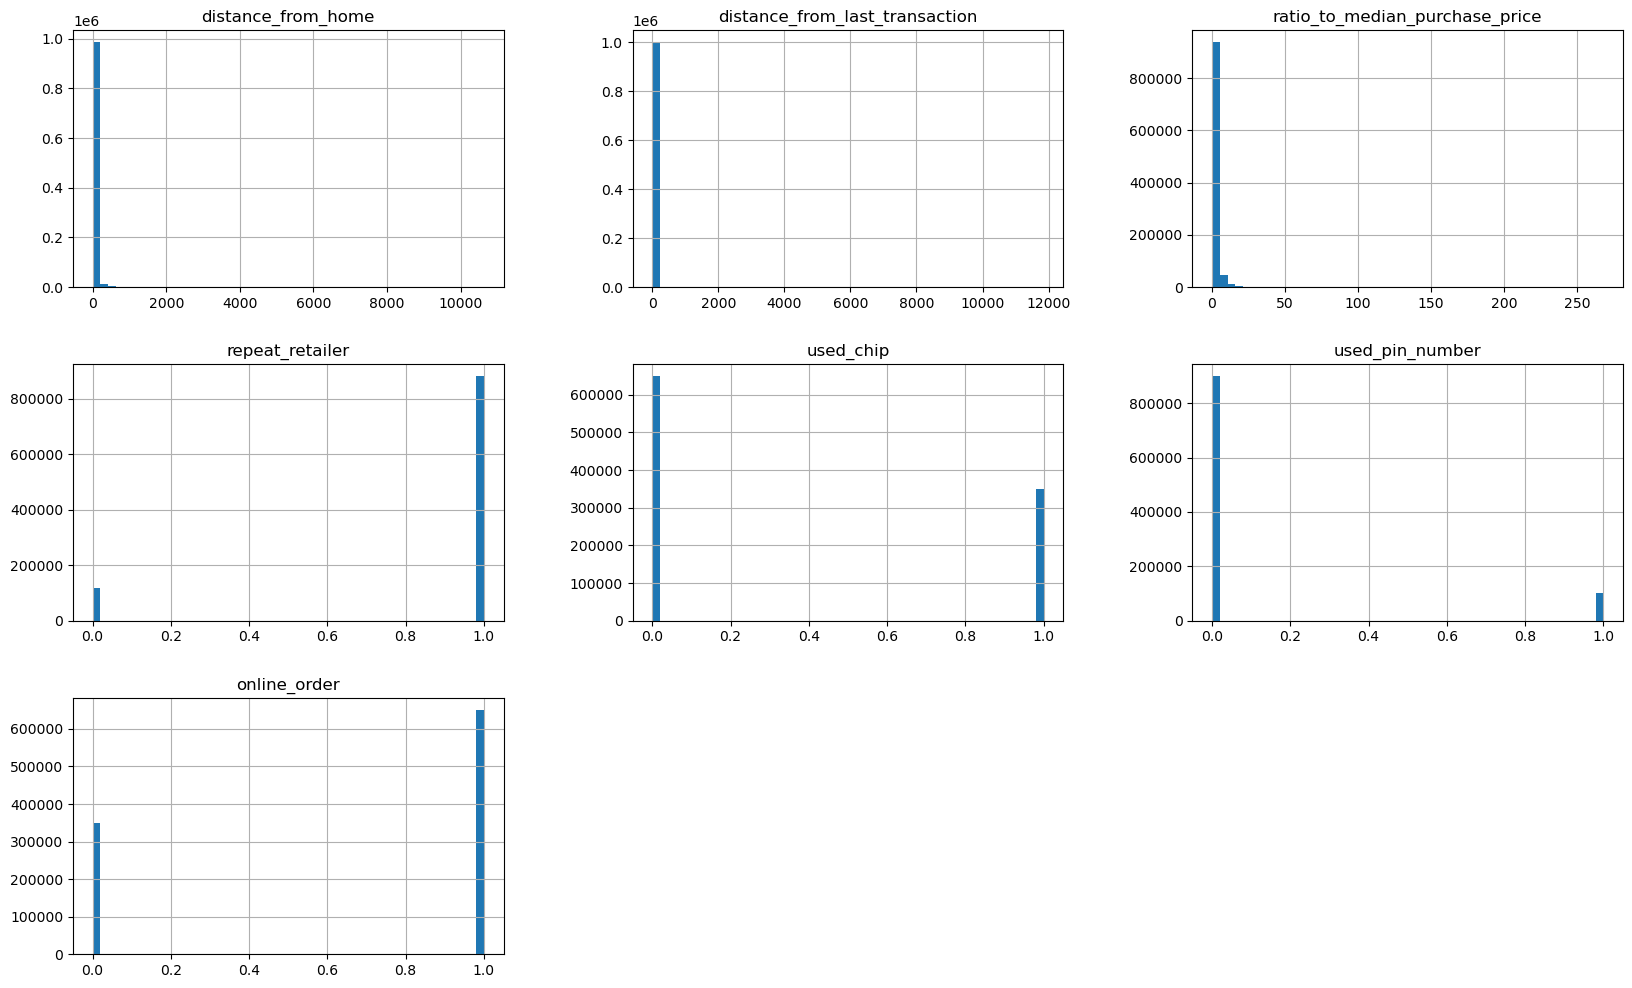

In [9]:
df.hist(bins= 50 , figsize= (20,12))
plt.show()

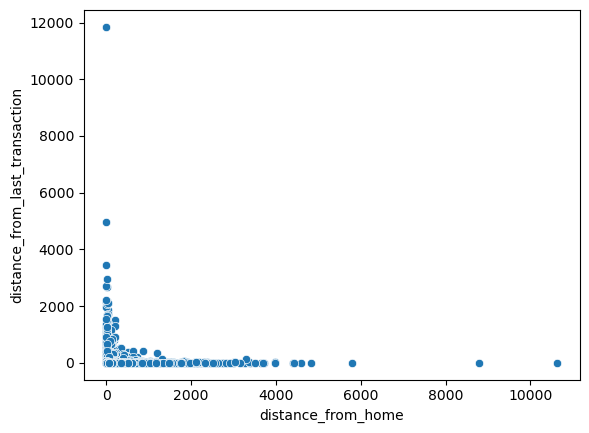

In [10]:
sns.scatterplot(data= df, x = 'distance_from_home',y= 'distance_from_last_transaction')
plt.show()

In [11]:
corr_matrix=df.corr()
corr_matrix

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,0.000193,-0.001374,0.143125,-0.000696,-0.001623,-0.001302
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002054,-0.000899,0.000141
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330
repeat_retailer,0.143125,-0.000928,0.001374,1.000000,-0.001344,-0.000418,-0.000533
used_chip,-0.000696,0.002054,0.000587,-0.001344,1.000000,-0.001394,-0.000223
used_pin_number,-0.001623,-0.000899,0.000942,-0.000418,-0.001394,1.000000,-0.000290
online_order,-0.001302,0.000141,-0.000330,-0.000533,-0.000223,-0.000290,1.000000


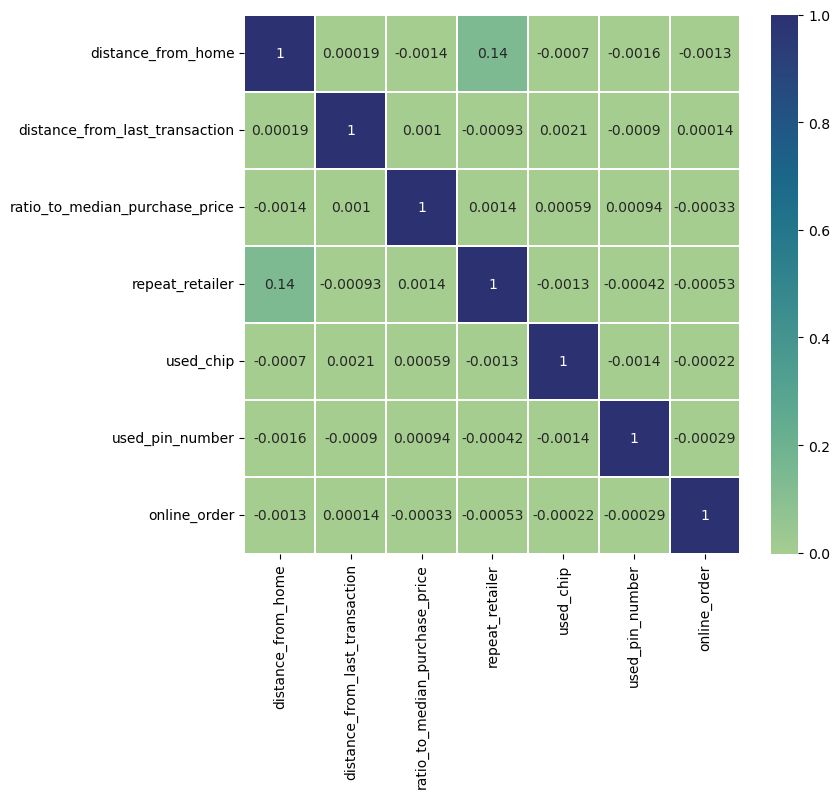

In [12]:
fig,ax = plt.subplots(1,1 , figsize =(8,7))
sns.heatmap(corr_matrix,annot= True, cmap = 'crest',linewidths=0.05,ax=ax)
plt.show()

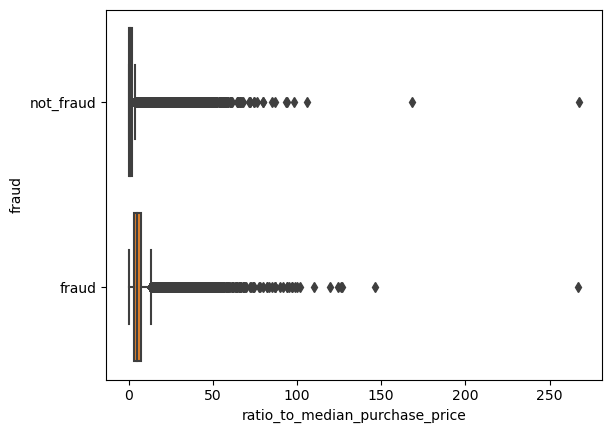

In [13]:
sns.boxplot(data=df ,x = 'ratio_to_median_purchase_price',y = 'fraud')
plt.show()

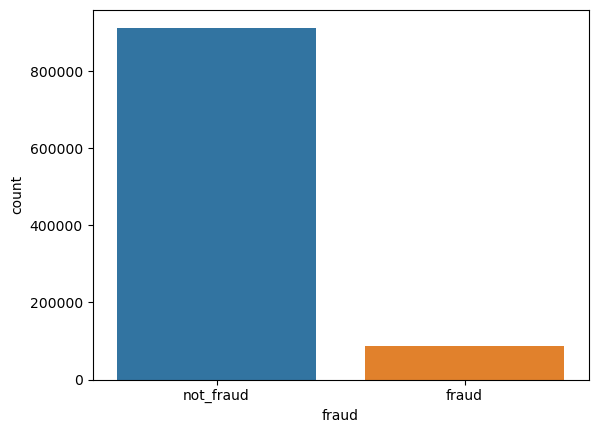

In [15]:
sns.countplot(data=df, x = 'fraud')
plt.show()

In [8]:
def percetage_of_nan(df,col):
    num = df[col].isna().sum()
    tot = df.shape[0]
    return f"The percentage of NAN values in the {col} is {(num/tot)*100} %\n"

In [9]:
for i in df.columns:
    print(percetage_of_nan(df,i))

The percentage of NAN values in the distance_from_home is 0.0 %

The percentage of NAN values in the distance_from_last_transaction is 0.0 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.0 %

The percentage of NAN values in the repeat_retailer is 0.0 %

The percentage of NAN values in the used_chip is 0.0 %

The percentage of NAN values in the used_pin_number is 0.0 %

The percentage of NAN values in the online_order is 0.0 %

The percentage of NAN values in the fraud is 0.0 %



In [6]:
for i in df.columns:
    df.dropna(subset= i, axis= 0,inplace=True)

In [10]:
for i in df.columns:
    print(percetage_of_nan(df,i))

The percentage of NAN values in the distance_from_home is 0.0 %

The percentage of NAN values in the distance_from_last_transaction is 0.0 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.0 %

The percentage of NAN values in the repeat_retailer is 0.0 %

The percentage of NAN values in the used_chip is 0.0 %

The percentage of NAN values in the used_pin_number is 0.0 %

The percentage of NAN values in the online_order is 0.0 %

The percentage of NAN values in the fraud is 0.0 %



In [22]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape[0]

1000000

# Prepare data for modeling 

In [12]:
not_fraud = df[df['fraud'] == 'not_fraud']
fraud= df[df['fraud'] == 'fraud']

In [13]:
not_fraud.shape

(912597, 8)

In [14]:
fraud.shape

(87403, 8)

In [15]:
df.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
fraud,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318
not_fraud,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225


In [16]:
# fraud shape is 87403
not_fraud_data = not_fraud.sample(n=87403)

In [17]:
not_fraud_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
448484,3.979732,0.129010,1.117733,1.0,0.0,0.0,1.0,not_fraud
795829,8.131921,4.672300,2.679723,1.0,1.0,0.0,1.0,not_fraud
805094,2.805753,7.125938,0.530996,1.0,1.0,0.0,0.0,not_fraud
30990,10.017426,6.120051,0.740788,1.0,0.0,0.0,1.0,not_fraud
720903,54.738486,18.490443,0.648909,1.0,0.0,0.0,1.0,not_fraud
...,...,...,...,...,...,...,...,...
510469,42.568388,1.792269,0.566859,1.0,1.0,0.0,1.0,not_fraud
814673,13.377797,15.216946,2.078134,1.0,0.0,1.0,1.0,not_fraud
820229,6.158633,0.381509,1.436040,1.0,0.0,0.0,1.0,not_fraud
947955,10.862552,0.666716,1.509336,1.0,0.0,0.0,1.0,not_fraud


In [18]:
final_data = pd.concat([not_fraud_data, fraud], axis=0)

In [19]:
final_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
448484,3.979732,0.129010,1.117733,1.0,0.0,0.0,1.0,not_fraud
795829,8.131921,4.672300,2.679723,1.0,1.0,0.0,1.0,not_fraud
805094,2.805753,7.125938,0.530996,1.0,1.0,0.0,0.0,not_fraud
30990,10.017426,6.120051,0.740788,1.0,0.0,0.0,1.0,not_fraud
720903,54.738486,18.490443,0.648909,1.0,0.0,0.0,1.0,not_fraud
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,fraud
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,fraud
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,fraud
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,fraud


In [20]:
final_data.groupby('fraud').mean()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
fraud,,,,,,,
fraud,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318
not_fraud,22.787157,4.258401,1.433125,0.882453,0.359438,0.110122,0.622256


In [21]:
final_data['fraud'].value_counts()

not_fraud    87403
fraud        87403
Name: fraud, dtype: int64

In [22]:
x = final_data.drop('fraud', axis=1)
y = final_data['fraud']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
print(x_train.shape, x_test.shape, x.shape)

(139844, 7) (34962, 7) (174806, 7)


In [25]:
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)

In [26]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [27]:
x_test_scaled = ss.transform(x_test)
y_test_encoded = le.transform(y_test)

## Now we go with the model

#### Logistic Regression

In [28]:
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []

def calculate_acc(true, pred):
    precision.append(precision_score(true, pred))
    recall.append(recall_score(true, pred))
    f1.append(f1_score(true, pred))
    

In [29]:
lr = LogisticRegression()
lr.fit(x_train_scaled, y_train_encoded)
lr_pred = lr.predict(x_test_scaled)

In [30]:
accuracy_score(y_test_encoded, lr_pred)

0.9403924260625822

In [31]:
lr_cv = cross_val_score(lr, x_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
lr_score = lr_cv.mean()
train_accuracy.append(lr_score)
test_accuracy.append(accuracy_score(y_test_encoded, lr_pred))

In [32]:
calculate_acc(y_test_encoded, lr_pred)

<AxesSubplot:>

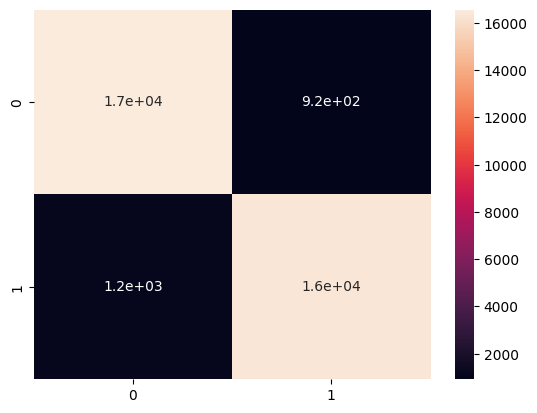

In [33]:
cm_lr = confusion_matrix(y_test_encoded, lr_pred)
sns.heatmap(cm_lr, annot=True)

#### Decision Tree

In [34]:
dt = DecisionTreeClassifier()

params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50]
}

dt_grid = GridSearchCV(dt, param_grid=params, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_grid.fit(x_train_scaled, y_train_encoded)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [35]:
dt_clf = dt_grid.best_estimator_

In [36]:
dt_pred = dt_clf.predict(x_test_scaled)

test_acc = accuracy_score(y_test_encoded, dt_pred)
train_acc = accuracy_score(y_train_encoded, dt_clf.predict(x_train_scaled))
test_acc, train_acc

(0.999942795034609, 0.9999213409227424)

In [37]:
train_accuracy.append(train_acc)
test_accuracy.append(test_acc)
calculate_acc(y_test_encoded, dt_pred)

<AxesSubplot:>

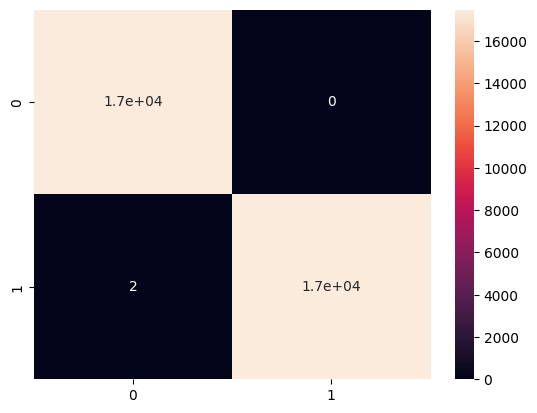

In [38]:
cm_dt = confusion_matrix(y_test_encoded, dt_pred)
sns.heatmap(cm_dt, annot = True)

#### Random Forest

In [39]:
rfc = RandomForestClassifier()

parameters = { 
    'n_estimators': [50, 100, 150], 
     
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

rfc_grid = GridSearchCV(rfc, param_grid=parameters, cv=3)

rfc_grid.fit(x_train_scaled, y_train_encoded)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [50, 100, 150]})

In [40]:
rfc_grid.best_params_

{'max_depth': 9, 'max_leaf_nodes': 9, 'n_estimators': 150}

In [41]:
rfc_clf = RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=100, max_features='sqrt')
rfc_clf.fit(x_train_scaled, y_train_encoded)

rfc_pred = rfc_clf.predict(x_test_scaled)

In [42]:
test_acc = accuracy_score(y_test_encoded, rfc_pred)
train_acc = accuracy_score(y_train_encoded, rfc_clf.predict(x_train_scaled))
test_acc, train_acc

(0.9917338825010011, 0.9923772203312262)

In [43]:
train_accuracy.append(train_acc)
test_accuracy.append(test_acc)

In [44]:
calculate_acc(y_test_encoded, rfc_pred)

<AxesSubplot:>

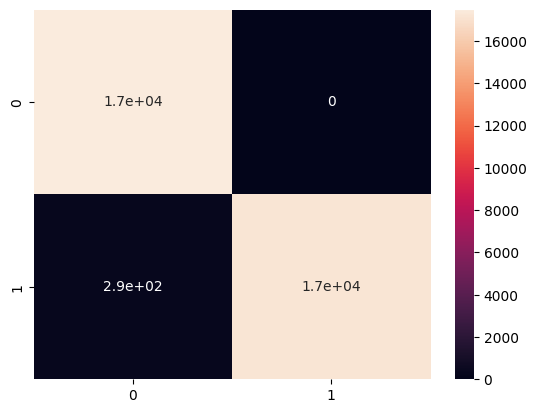

In [45]:
cm_rfc = confusion_matrix(y_test_encoded, rfc_pred)
sns.heatmap(cm_rfc, annot=True)

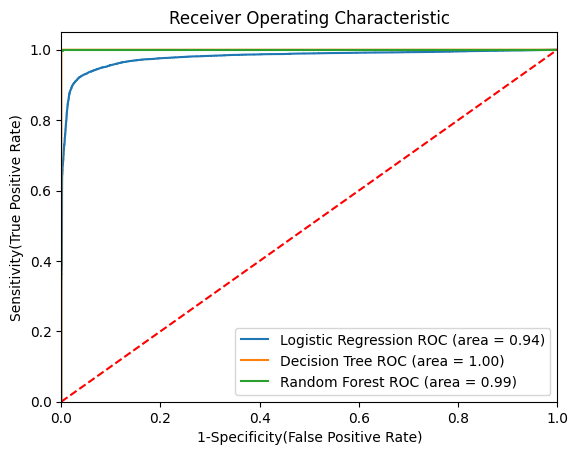

In [46]:
plt.figure()

models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
     'label' : 'Decision Tree',
     'model' : dt_clf
},
{
    'label': 'Random Forest',
    'model': rfc_clf,
}
]

for m in models:
    model = m['model']
    model.fit(x_train_scaled, y_train_encoded)
    y_pred=model.predict(x_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(y_test_encoded, model.predict_proba(x_test_scaled)[:,1])
    auc = roc_auc_score(y_test_encoded,model.predict(x_test_scaled))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   

In [47]:
models = ['Logistic Regression','Decision Tree', 'Random Forest']
model_df = pd.DataFrame(index=models, columns=['precision', 'recall', 'f1-score', 'train_accuracy', 'test_accuracy'])
model_df['precision'] = precision
model_df['recall'] = recall
model_df['f1-score'] = f1
model_df['train_accuracy'] = train_accuracy
model_df['test_accuracy'] = test_accuracy

In [48]:
model_df

,precision,recall,f1-score,train_accuracy,test_accuracy
Logistic Regression,0.946626,0.933413,0.939974,0.940620,0.940392
Decision Tree,1.000000,0.999886,0.999943,0.999921,0.999943
Random Forest,1.000000,0.983468,0.991665,0.992377,0.991734


In [49]:
print("all done baby")

karim
